In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt

import scipy.signal as sig

%run fx4assembly.py
%run fx4behavior.py
%run fx4makingsnips.py

%matplotlib inline

In [2]:
test_sessions = metafile2sessions("..\\data\\test_ppp3.xlsx",
                                  "..\\data\\test",
                                  "..\\data\\",
                                  "..\\output\\")

In [3]:
ppp4_sessions = metafile2sessions('D:\\DA_and_Reward\\gc214\\PPP4\\PPP4.xlsx',
                                  'D:\\DA_and_Reward\\gc214\\PPP4\\PPP4_metafile',
                                  'D:\\DA_and_Reward\\gc214\\PPP4\\tdtfiles\\',
                                  'D:\\DA_and_Reward\\gc214\\PPP4\\output\\',
                                  sheetname='PPP4_metafile')

In [7]:
dir(s)

['SigBlue',
 'SigUV',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'both',
 'bottleL',
 'bottleR',
 'box',
 'check4events',
 'data',
 'dataUV',
 'data_filt',
 'diet',
 'event2sample',
 'fs',
 'left',
 'loaddata',
 'medfile',
 'outputfolder',
 'rat',
 'right',
 'session',
 'sessionID',
 'sessiontype',
 'setbottlecolors',
 'setticks',
 'side2subs',
 't2sMap',
 'tdtfile',
 'tick',
 'time2samples',
 'ttl_licksL',
 'ttl_licksR',
 'ttl_trialsL',
 'ttl_trialsR',
 'ttls']

In [4]:
test_sessions
# s = test_sessions['PPP1-7_s10'] # for testing PPP1
# s = test_sessions['PPP1-7_s10'] # for testing PPP3

s = ppp4_sessions['PPP4-8_s10'] # for testing different rats in PPP4

s.loaddata()
s.data_filt = correctforbaseline(s.data, s.dataUV)
s.setticks()
s.time2samples()
s.check4events()
s.setbottlecolors()

Found Synapse note file: D:\DA_and_Reward\gc214\PPP4\tdtfiles\Giulia-191004-130416\Notes.txt
read from t=0s to t=1884.43s
Found Synapse note file: D:\DA_and_Reward\gc214\PPP4\tdtfiles\Giulia-191004-130416\Notes.txt
read from t=0s to t=1884.43s
Found Synapse note file: D:\DA_and_Reward\gc214\PPP4\tdtfiles\Giulia-191004-130416\Notes.txt
read from t=0s to t=1884.43s


In [6]:
try:
    s.left['lickdata'] = lickCalc(s.left['licks'],
                      offset = s.left['licks_off'],
                      burstThreshold = 0.50)
except IndexError:
    s.left['lickdata'] = 'none'
    print('No left licks')
    
try:
    s.right['lickdata'] = lickCalc(s.right['licks'],
              offset = s.right['licks_off'],
              burstThreshold = 0.50)
except IndexError:
    s.right['lickdata'] = 'none'
    print('No right licks')

[277.4171648, 342.07199232, 402.77979136, 460.79668224, 465.47161088, 481.81628928000003, 549.66706176, 551.09197824, 631.77347072, 632.9905152, 711.5100160000001, 713.11798272, 741.86141696, 777.47576832, 798.8693811200001, 898.2165504000001, 961.65228544, 994.70266368, 1031.66398464, 1173.97233664, 1199.72388864, 1294.38605312, 1295.2250368, 1319.533568, 1324.48448512, 1346.68107776, 1367.85371136, 1399.1670988800001, 1420.76370944, 1456.52699136, 1503.95711488, 1534.92656128, 1572.18684928, 1608.6851584, 1609.478144, 1667.00904448, 1716.84020224, 1717.61614848, 1767.66513152, 1768.41314304, 1794.65572352, 1825.7790976000001]
[ 235.06489344  235.19891456  235.31495424 ... 1825.7790976  1826.75607552
 1827.01805568]
[178.98995712, 200.40261632, 203.93652224000002, 261.26843904000003, 308.06253568, 370.85941760000003, 424.53938176, 428.429312, 513.8556928, 587.8853632, 611.95886592, 671.8208, 691.8473728, 823.79988992, 826.8118425600001, 858.08922624, 917.08416, 935.22182144, 1053.3045

In [7]:
bins = 300

s.randomevents = makerandomevents(120, max(s.tick)-120)
s.bgTrials, s.pps = snipper(s.data, s.randomevents,
                                t2sMap = s.t2sMap, fs = s.fs, bins=bins)

In [14]:
%run fx4makingsnips.py

for side in [s.left, s.right]:   
    if side['exist'] == True:
        side['snips_sipper'] = mastersnipper(s, side['sipper'], peak_between_time=[0, 5],
                                             latency_events=side['lickdata']['rStart'],
                                             latency_direction='post')
        side['snips_licks'] = mastersnipper(s, side['lickdata']['rStart'], peak_between_time=[0, 2],
                                            latency_events=side['sipper'],
                                            latency_direction='pre')
                                           
        try:
            forced_licks = [licks for licks in side['lickdata']['rStart'] if licks in side['licks-forced']]
            side['snips_licks_forced'] = mastersnipper(s, forced_licks, peak_between_time=[0, 2],
                                                       latency_events=side['sipper'],
                                                       latency_direction='pre')
        except KeyError:
            pass
        try:
            side['lats'] = latencyCalc(side['lickdata']['licks'], side['sipper'], cueoff=side['sipper_off'], lag=0)
        except TypeError:
            print('Cannot work out latencies as there are lick and/or sipper values missing.')
            side['lats'] = []
s.side2subs()

21 events to analyze.
0 noise trials removed
15 events to analyze.
0 noise trials removed
15 events to analyze.
0 noise trials removed
21 events to analyze.
1 noise trials removed
41 events to analyze.
9 noise trials removed
21 events to analyze.
2 noise trials removed


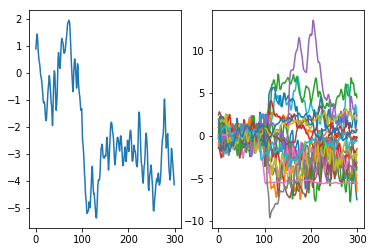

In [15]:
f, ax = plt.subplots(ncols=2)
ax[0].plot(s.cas['snips_sipper']['filt_avg_z'])
for trial in s.cas['snips_sipper']['filt_z']:
    ax[1].plot(trial)


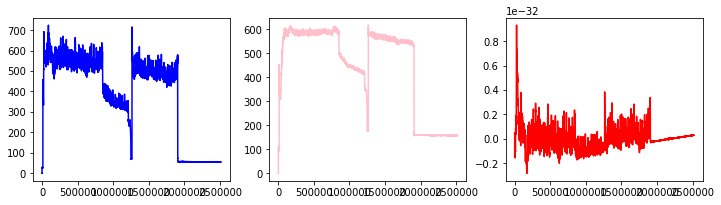

In [8]:
f, ax = plt.subplots(ncols=3, figsize=(12, 3))
ax[0].plot(s.data, color='blue')
ax[1].plot(s.dataUV, color='pink')
ax[2].plot(s.data_filt, color='red')



In [ ]:
# side=s.right
# side['snips_sipper'] = mastersnipper_filt(s, side['sipper'], peak_between_time=[0, 5])
# s.side2subs()

In [ ]:
# ax[0].plot(np.mean(s.cas['snips_sipper']['filt'], axis=0))
# ax[1].plot(np.mean(s.cas['snips_sipper']['filt_z'], axis=0))
# ax[2].plot(np.mean(s.cas['snips_sipper']['filt_z_adjBL'], axis=0))
# ax[3].plot(s.cas['snips_sipper']['filt_avg'])

    
for blue, uv, diff, filt, filt_z in zip(s.cas['snips_sipper']['blue'],
                                        s.cas['snips_sipper']['uv'],
                                        s.cas['snips_sipper']['diff'],
                                        s.cas['snips_sipper']['filt'],
                                        s.cas['snips_sipper']['filt_z']):
    f, ax = plt.subplots(ncols=4, figsize=(12,4))
    ax[0].plot(blue)
    ax[0].plot(uv)
    ax[1].plot(diff)
    ax[2].plot(filt)
    ax[3].plot(filt_z)

In [ ]:
s.cas['snips_sipper']['blue']

In [ ]:
s.cas['snips_licks_forced'].keys()

In [ ]:
s.ttls

In [ ]:
# how do we work out if there are n consecutive values that exceed a certain threshold (z_thresh) in a certain time window (e.g. 0-5 s after event)?
for filt_z in s.cas['snips_sipper']['filt_z']:
#     f, ax = plt.subplots()
#     ax.plot(filt_z)
    thresh = 2.5
    signifarray = [1 if val > thresh else 0 for val in filt_z[100:151]]
    
    
print(signifarray)

In [ ]:
diff = np.diff(signifarray)
diff.index(-1)

In [ ]:
np?